### Model Deployment

In [24]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load customer batch from Excel
batch_data = pd.read_csv('new_customers.csv',delimiter=";")  

In [3]:
batch_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
batch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [5]:
# Save identifiers separately
identifiers = batch_data[['id','Surname','CustomerId','Geography','Gender']]  

In [6]:
# Load model
model = joblib.load('churn_xgb_model.pkl')

In [7]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [8]:
# Preprocessing variables
scaler = StandardScaler()
batch_data['EstimatedSalary_scaled'] = scaler.fit_transform(batch_data[['EstimatedSalary']])

In [9]:
scaler = StandardScaler()
batch_data['Balance_scaled'] = scaler.fit_transform(batch_data[['Balance']])

In [10]:
scaler = MinMaxScaler()
batch_data['Age'] = scaler.fit_transform(batch_data[['Age']])

In [11]:
scaler = MinMaxScaler()
batch_data['CreditScore'] = scaler.fit_transform(batch_data[['CreditScore']])

In [12]:
batch_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,EstimatedSalary_scaled,Balance_scaled
0,165034,15773898,Lucchese,0.472,France,Female,0.067568,2,0.00,2,0.0,1.0,160976.75,0.967874,-0.881274
1,165035,15782418,Nott,0.666,France,Female,0.378378,2,0.00,1,1.0,0.0,72549.27,-0.790939,-0.881274
2,165036,15807120,K?,0.612,France,Female,0.216216,7,0.00,2,1.0,0.0,138882.09,0.528413,-0.881274
3,165037,15808905,O'Donnell,0.662,France,Male,0.243243,8,0.00,1,1.0,0.0,113931.57,0.032150,-0.881274
4,165038,15607314,Higgins,0.804,Germany,Male,0.270270,10,121263.62,1,1.0,0.0,139431.00,0.539331,1.050038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,0.440,Spain,Male,0.148649,7,116099.82,1,1.0,1.0,148087.62,0.711510,0.967796
110019,275053,15774133,Cox,0.450,France,Female,0.243243,4,178032.53,1,1.0,1.0,42181.68,-1.394946,1.954171
110020,275054,15728456,Ch'iu,0.724,France,Male,0.175676,2,0.00,2,1.0,0.0,16287.38,-1.909981,-0.881274
110021,275055,15687541,Yegorova,0.718,France,Female,0.189189,3,0.00,1,1.0,1.0,158816.58,0.924908,-0.881274


In [13]:
# Select only model features
features = ['CreditScore','Age', 'Tenure',
            'NumOfProducts', 'HasCrCard','IsActiveMember','Balance_scaled', 'EstimatedSalary_scaled']

X_batch = batch_data[features]

In [14]:
X_batch

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Balance_scaled,EstimatedSalary_scaled
0,0.472,0.067568,2,2,0.0,1.0,-0.881274,0.967874
1,0.666,0.378378,2,1,1.0,0.0,-0.881274,-0.790939
2,0.612,0.216216,7,2,1.0,0.0,-0.881274,0.528413
3,0.662,0.243243,8,1,1.0,0.0,-0.881274,0.032150
4,0.804,0.270270,10,1,1.0,0.0,1.050038,0.539331
...,...,...,...,...,...,...,...,...
110018,0.440,0.148649,7,1,1.0,1.0,0.967796,0.711510
110019,0.450,0.243243,4,1,1.0,1.0,1.954171,-1.394946
110020,0.724,0.175676,2,2,1.0,0.0,-0.881274,-1.909981
110021,0.718,0.189189,3,1,1.0,1.0,-0.881274,0.924908


# --- Make predictions ---

In [15]:
batch_data['Churn_Prediction'] = model.predict(X_batch)
batch_data['Churn_Probability'] = model.predict_proba(X_batch)[:, 1]

In [16]:
# Add back ID info to results
results = pd.concat([identifiers, batch_data[['Churn_Prediction', 'Churn_Probability']]], axis=1)

In [19]:
results.head()

,id,Surname,CustomerId,Geography,Gender,Churn_Prediction,Churn_Probability
0,165034,Lucchese,15773898,France,Female,0,0.054426
1,165035,Nott,15782418,France,Female,1,0.847484
2,165036,K?,15807120,France,Female,0,0.026098
3,165037,O'Donnell,15808905,France,Male,0,0.440091
4,165038,Higgins,15607314,Germany,Male,0,0.237169


In [17]:
# Save to Excel
results.to_excel('churn_predictions_with_ids.xlsx', index=False)
print("Churn predictions saved to 'churn_predictions_with_ids.xlsx'")

Churn predictions saved to 'churn_predictions_with_ids.xlsx'


In [20]:
results['Churn_Prediction'].value_counts()

Churn_Prediction
0    87946
1    22077
Name: count, dtype: int64

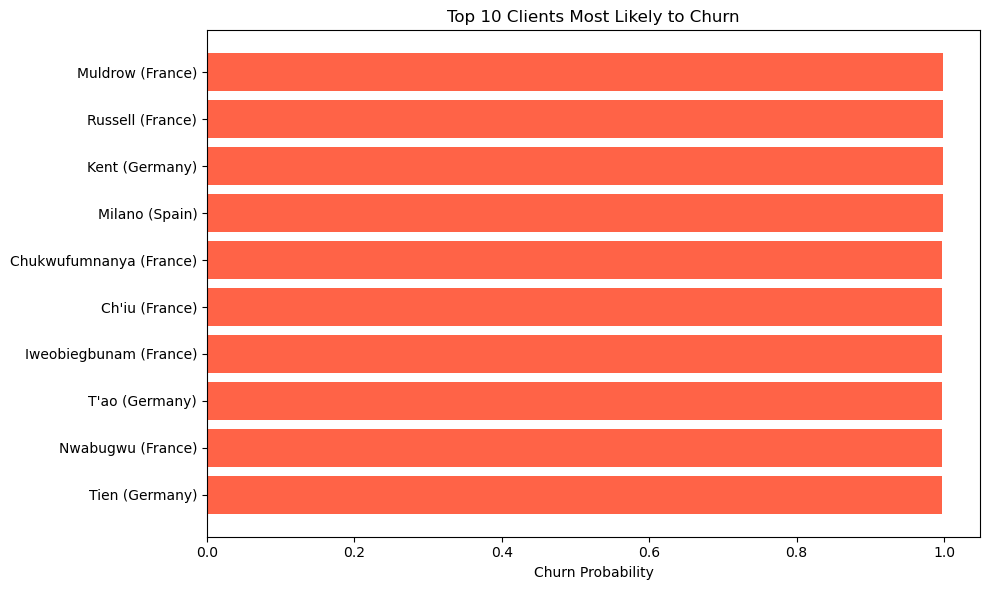

In [30]:
# Filter customer likely to churn
likely_churn = results[results['Churn_Prediction'] == 1]

# Top 10 by churn probability
top_risk = likely_churn.sort_values(by='Churn_Probability', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_risk['Surname'] + " (" + top_risk['Geography'] + ")", top_risk['Churn_Probability'], color='tomato')
plt.xlabel("Churn Probability")
plt.title("Top 10 Clients Most Likely to Churn")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

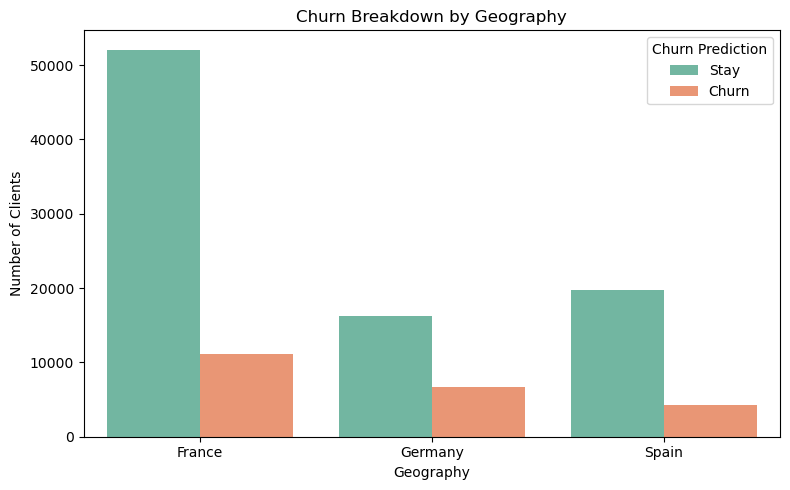

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=results, x='Geography', hue='Churn_Prediction', palette='Set2')
plt.title("Churn Breakdown by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Clients")
plt.legend(title="Churn Prediction", labels=["Stay", "Churn"])
plt.tight_layout()
plt.show()

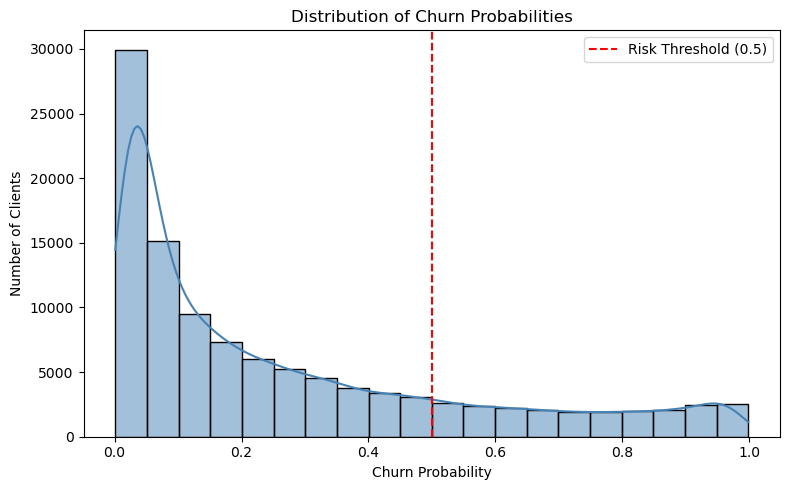

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(results['Churn_Probability'], bins=20, kde=True, color='steelblue')
plt.axvline(0.5, color='red', linestyle='--', label='Risk Threshold (0.5)')
plt.title("Distribution of Churn Probabilities")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Clients")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
top_100 = results[results['Churn_Prediction'] == 1].sort_values(by='Churn_Probability', ascending=False).head(100)
top_100.to_excel("top_churn_risk_clients.xlsx", index=False)